## Introduction
<p align = "justify">
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; In this project, I do some analysis and visualization on samples of scores UTBK SBMPTN 2019 data. I do that because I want to find informations and insights about UTBK  in 2019, e.g. what majors and universities are the most favourite in 2019, distribution of participants UTBK scores in 2019,  etc.
 <br></br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The data  used in this project is 147k samples of scores from Indonesia UTBK SBMPTN 2019, taken from Kaggle (https://www.kaggle.com/ekojsalim/indonesia-college-entrance-examination-utbk-2019). After that, I do some preprocessing on the data and create new columns that is participants average scores (do average on each participants scores), majors and universities names of the participants first and second choice, etc. Then, do some analysis in order to get insight or information from data, and make data visualization so that the data can be easily understood. 
</p>

In [1]:
# Import some libraries

import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')
import textwrap

In [2]:
# Load data from a CSV file into pandas dataFrame

data_score_humanities = pd.read_csv('data/score_humanities.csv')
data_score_science = pd.read_csv('data/score_science.csv')
data_universities = pd.read_csv('data/universities.csv')
data_majors = pd.read_csv('data/majors.csv')

In [3]:
score_humanities = data_score_humanities.copy()
score_humanities.head()

,Unnamed: 0,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_eko,score_geo,score_kmb,score_kpu,score_kua,score_mat,score_ppu,score_sej,score_sos
0,0,3322014,332,3532154,353,26,778,486,679,594,643,686,559,392,676
1,1,3212057,321,3322022,332,35,579,631,710,700,810,656,638,535,686
2,2,3722057,372,1912042,191,44,600,481,314,432,522,494,461,467,574
3,3,3212081,321,3212301,321,55,559,563,646,638,591,538,585,647,589
4,4,3812106,381,3852034,385,171,838,734,654,613,690,315,628,660,674


In [4]:
score_science = data_score_science.copy()
score_science.head()

,Unnamed: 0,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu
0,0,3321065,332,3331187,333,4,400,400,400,400,400,400,400,400
1,1,3211015,321,3611066,361,14,816,666,651,678,685,706,695,562
2,2,3721093,372,3551302,355,19,562,839,624,700,781,464,551,668
3,3,3321096,332,3551194,355,23,700,669,692,679,692,813,507,573
4,4,5211104,521,5211085,521,28,461,619,441,593,563,500,666,370


In [5]:
data_majors.head()

,Unnamed: 0,id_major,id_university,type,major_name,capacity
0,0,1111014,111,science,PENDIDIKAN DOKTER HEWAN,88
1,1,1111022,111,science,TEKNIK SIPIL,64
2,2,1111037,111,science,TEKNIK MESIN,48
3,3,1111045,111,science,TEKNIK KIMIA,48
4,4,1111053,111,science,ARSITEKTUR,48


In [6]:
data_universities.head()

,Unnamed: 0,id_university,university_name
0,0,111,UNIVERSITAS SYIAH KUALA
1,1,112,UNIVERSITAS MALIKUSSALEH
2,2,113,UNIVERSITAS TEUKU UMAR
3,3,114,UNIVERSITAS SAMUDRA
4,4,115,ISBI ACEH


In [7]:
# Informations on each data

print(score_humanities.info())
print('\n')
print(score_science.info())
print('\n')
print(data_majors.info())
print('\n')
print(data_universities.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61202 entries, 0 to 61201
Data columns (total 15 columns):
Unnamed: 0              61202 non-null int64
id_first_major          61202 non-null int64
id_first_university     61202 non-null int64
id_second_major         61202 non-null int64
id_second_university    61202 non-null int64
id_user                 61202 non-null int64
score_eko               61202 non-null int64
score_geo               61202 non-null int64
score_kmb               61202 non-null int64
score_kpu               61202 non-null int64
score_kua               61202 non-null int64
score_mat               61202 non-null int64
score_ppu               61202 non-null int64
score_sej               61202 non-null int64
score_sos               61202 non-null int64
dtypes: int64(15)
memory usage: 7.0 MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86570 entries, 0 to 86569
Data columns (total 14 columns):
Unnamed: 0              86570 non-null int64
id_first_major  

# Exploratory Data Analysis

In [8]:
data_majors.head()

,Unnamed: 0,id_major,id_university,type,major_name,capacity
0,0,1111014,111,science,PENDIDIKAN DOKTER HEWAN,88
1,1,1111022,111,science,TEKNIK SIPIL,64
2,2,1111037,111,science,TEKNIK MESIN,48
3,3,1111045,111,science,TEKNIK KIMIA,48
4,4,1111053,111,science,ARSITEKTUR,48


In [9]:
data_universities.head()

,Unnamed: 0,id_university,university_name
0,0,111,UNIVERSITAS SYIAH KUALA
1,1,112,UNIVERSITAS MALIKUSSALEH
2,2,113,UNIVERSITAS TEUKU UMAR
3,3,114,UNIVERSITAS SAMUDRA
4,4,115,ISBI ACEH


In [10]:
# Replace "Ilmu Hukum" to "Hukum", "Kedokteran" to "Pendidikan Dokter" because there are have same meaning
data_majors['major_name'].replace('ILMU HUKUM', 'HUKUM', inplace = True)
data_majors['major_name'].replace('KEDOKTERAN', 'PENDIDIKAN DOKTER', inplace = True)
data_majors['major_name'].replace('ILMU HUBUNGAN INTERNASIONAL', 'HUBUNGAN INTERNASIONAL', inplace = True)
# Merge data majors and univ to get university name
data_major_univ = pd.merge(data_majors, data_universities[['id_university', 'university_name']], left_on = 'id_university',
                           right_on = 'id_university')
data_major_univ.drop(['Unnamed: 0'], axis = 1, inplace = True)
# Join major and university name
data_major_univ['major_univ_name'] = data_major_univ['major_name'] +' - ' +data_major_univ['university_name']

In [11]:
data_major_univ

,id_major,id_university,type,major_name,capacity,university_name,major_univ_name
0,1111014,111,science,PENDIDIKAN DOKTER HEWAN,88,UNIVERSITAS SYIAH KUALA,PENDIDIKAN DOKTER HEWAN - UNIVERSITAS SYIAH KUALA
1,1111022,111,science,TEKNIK SIPIL,64,UNIVERSITAS SYIAH KUALA,TEKNIK SIPIL - UNIVERSITAS SYIAH KUALA
2,1111037,111,science,TEKNIK MESIN,48,UNIVERSITAS SYIAH KUALA,TEKNIK MESIN - UNIVERSITAS SYIAH KUALA
3,1111045,111,science,TEKNIK KIMIA,48,UNIVERSITAS SYIAH KUALA,TEKNIK KIMIA - UNIVERSITAS SYIAH KUALA
4,1111053,111,science,ARSITEKTUR,48,UNIVERSITAS SYIAH KUALA,ARSITEKTUR - UNIVERSITAS SYIAH KUALA
...,...,...,...,...,...,...,...
3162,9132014,913,humanities,DESAIN KOMUNIKASI VISUAL,10,ISBI TANAH PAPUA,DESAIN KOMUNIKASI VISUAL - ISBI TANAH PAPUA
3163,9132022,913,humanities,SENI RUPA MURNI,10,ISBI TANAH PAPUA,SENI RUPA MURNI - ISBI TANAH PAPUA
3164,9132037,913,humanities,SENI KRIYA,11,ISBI TANAH PAPUA,SENI KRIYA - ISBI TANAH PAPUA
3165,9132045,913,humanities,SENI MUSIK,11,ISBI TANAH PAPUA,SENI MUSIK - ISBI TANAH PAPUA


In [12]:
#  Calculate the average of total score
score_humanities['avg_score_participant'] = score_humanities.iloc[:, 6:15].mean(axis = 1)
score_science['avg_score_participant'] = score_science.iloc[:, 6:14].mean(axis = 1)

In [13]:
score_humanities.head()

,Unnamed: 0,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_eko,score_geo,score_kmb,score_kpu,score_kua,score_mat,score_ppu,score_sej,score_sos,avg_score_participant
0,0,3322014,332,3532154,353,26,778,486,679,594,643,686,559,392,676,610.333333
1,1,3212057,321,3322022,332,35,579,631,710,700,810,656,638,535,686,660.555556
2,2,3722057,372,1912042,191,44,600,481,314,432,522,494,461,467,574,482.777778
3,3,3212081,321,3212301,321,55,559,563,646,638,591,538,585,647,589,595.111111
4,4,3812106,381,3852034,385,171,838,734,654,613,690,315,628,660,674,645.111111


In [14]:
# Merge score_humanities with major and university dataframe to get major and university names
# First choice major and university
score_humanities = pd.merge(score_humanities, data_major_univ[['id_major', 'id_university', 'major_name', 'university_name', 'major_univ_name']]
                            , left_on = ['id_first_major', 'id_first_university']
                            , right_on = ['id_major', 'id_university']).drop(['id_major', 'id_university', 'id_first_major', 'id_first_university'], axis = 1)

score_humanities.rename(columns={'major_univ_name' : 'specific_first_choice'}, inplace = True)
score_humanities['avg_score_participant_first_choice'] = score_humanities.groupby('specific_first_choice')['avg_score_participant'].transform('mean')

# Second choice major and university
# Initiate suffixes to give specific columns name because there are major and university name columns before, so it will be duplicated.
score_humanities = pd.merge(score_humanities, data_major_univ[['id_major', 'id_university', 'major_name', 'university_name', 'major_univ_name']]
                            , left_on = ['id_second_major', 'id_second_university']
                            , right_on = ['id_major', 'id_university']
                            , suffixes=('_first_choice', '_second_choice')).drop(['id_major', 'id_university', 'id_second_major', 'id_second_university'], axis = 1)

score_humanities.rename(columns={'major_univ_name' : 'specific_second_choice'}, inplace = True)
score_humanities['avg_score_participant_second_choice'] = score_humanities.groupby('specific_second_choice')['avg_score_participant'].transform('mean')


# Drop 'Unnamed: 0' columns, which is will not use in this project. Then, sort values by id_user
score_humanities = score_humanities.drop('Unnamed: 0', axis = 1).sort_values('id_user')
score_humanities.head()

,id_user,score_eko,score_geo,score_kmb,score_kpu,score_kua,score_mat,score_ppu,score_sej,score_sos,avg_score_participant,major_name_first_choice,university_name_first_choice,specific_first_choice,avg_score_participant_first_choice,major_name_second_choice,university_name_second_choice,specific_second_choice,avg_score_participant_second_choice
0,26,778,486,679,594,643,686,559,392,676,610.333333,FAKULTAS SENIRUPA DAN DESAIN (FSRD),INSTITUT TEKNOLOGI BANDUNG,FAKULTAS SENIRUPA DAN DESAIN (FSRD) - INSTITUT...,573.447122,DESAIN KOMUNIKASI VISUAL,UNIVERSITAS SEBELAS MARET,DESAIN KOMUNIKASI VISUAL - UNIVERSITAS SEBELAS...,549.880193
3076,35,579,631,710,700,810,656,638,535,686,660.555556,ILMU KOMUNIKASI,UNIVERSITAS INDONESIA,ILMU KOMUNIKASI - UNIVERSITAS INDONESIA,569.865539,SEKOLAH BISNIS DAN MANAJEMEN (SBM),INSTITUT TEKNOLOGI BANDUNG,SEKOLAH BISNIS DAN MANAJEMEN (SBM) - INSTITUT ...,572.977623
17547,44,600,481,314,432,522,494,461,467,574,482.777778,MANAJEMEN,UNIVERSITAS BRAWIJAYA,MANAJEMEN - UNIVERSITAS BRAWIJAYA,557.766667,MANAJEMEN,UNIVERSITAS LAMPUNG,MANAJEMEN - UNIVERSITAS LAMPUNG,518.014286
12939,55,559,563,646,638,591,538,585,647,589,595.111111,KRIMINOLOGI,UNIVERSITAS INDONESIA,KRIMINOLOGI - UNIVERSITAS INDONESIA,560.866487,BAHASA DAN KEBUDAYAAN KOREA,UNIVERSITAS INDONESIA,BAHASA DAN KEBUDAYAAN KOREA - UNIVERSITAS INDO...,544.579580
27359,171,838,734,654,613,690,315,628,660,674,645.111111,AKUNTANSI,UNIVERSITAS AIRLANGGA,AKUNTANSI - UNIVERSITAS AIRLANGGA,581.265726,AKUNTANSI,"UPN ""VETERAN"" JAWA TIMUR","AKUNTANSI - UPN ""VETERAN"" JAWA TIMUR",548.292616


In [15]:
# Merge score_science with major and university dataframe to get major and university names
# First choice major and university
score_science = pd.merge(score_science, data_major_univ[['id_major', 'id_university', 'major_name', 'university_name', 'major_univ_name']]
                            , left_on = ['id_first_major', 'id_first_university']
                            , right_on = ['id_major', 'id_university']).drop(['id_major', 'id_university', 'id_first_major', 'id_first_university'], axis = 1)

score_science.rename(columns={'major_univ_name' : 'specific_first_choice'}, inplace = True)
score_science['avg_score_participant_first_choice'] = score_science.groupby('specific_first_choice')['avg_score_participant'].transform('mean')

# Second choice major and university
# Initiate suffixes to give specific columns name because there are major and university name columns before, so it will be duplicated.

score_science = pd.merge(score_science, data_major_univ[['id_major', 'id_university', 'major_name', 'university_name', 'major_univ_name']]
                            , left_on = ['id_second_major', 'id_second_university']
                            , right_on = ['id_major', 'id_university']
                            , suffixes=('_first_choice', '_second_choice')).drop(['id_major', 'id_university', 'id_second_major', 'id_second_university'], axis = 1)

score_science.rename(columns={'major_univ_name' : 'specific_second_choice'}, inplace = True)
score_science['avg_score_participant_second_choice'] = score_science.groupby('specific_second_choice')['avg_score_participant'].transform('mean')


# Drop 'Unnamed: 0' columns, which is will not use in this project. Then, sort values by id_user
score_science = score_science.drop('Unnamed: 0', axis = 1).sort_values('id_user')
score_science.head()

,id_user,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu,avg_score_participant,major_name_first_choice,university_name_first_choice,specific_first_choice,avg_score_participant_first_choice,major_name_second_choice,university_name_second_choice,specific_second_choice,avg_score_participant_second_choice
0,4,400,400,400,400,400,400,400,400,400.000,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,INSTITUT TEKNOLOGI BANDUNG,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS - I...,601.102586,PSIKOLOGI,UNIVERSITAS PADJADJARAN,PSIKOLOGI - UNIVERSITAS PADJADJARAN,557.648634
6387,14,816,666,651,678,685,706,695,562,682.375,PENDIDIKAN DOKTER,UNIVERSITAS INDONESIA,PENDIDIKAN DOKTER - UNIVERSITAS INDONESIA,610.945050,PENDIDIKAN DOKTER,UNIVERSITAS GADJAH MADA,PENDIDIKAN DOKTER - UNIVERSITAS GADJAH MADA,606.664062
929,19,562,839,624,700,781,464,551,668,648.625,ILMU DAN TEKNOLOGI PANGAN,UNIVERSITAS BRAWIJAYA,ILMU DAN TEKNOLOGI PANGAN - UNIVERSITAS BRAWIJAYA,554.377591,TEKNOLOGI PANGAN,UNIVERSITAS DIPONEGORO,TEKNOLOGI PANGAN - UNIVERSITAS DIPONEGORO,564.494391
28596,23,700,669,692,679,692,813,507,573,665.625,FAKULTAS TEKNIK MESIN & DIRGANTARA (FTMD),INSTITUT TEKNOLOGI BANDUNG,FAKULTAS TEKNIK MESIN & DIRGANTARA (FTMD) - IN...,618.625000,TEKNIK MESIN,UNIVERSITAS DIPONEGORO,TEKNIK MESIN - UNIVERSITAS DIPONEGORO,590.535590
32886,28,461,619,441,593,563,500,666,370,526.625,TEKNIK PERANGKAT LUNAK (TEK. INFORMATIKA),UNIVERSITAS PALANGKARAYA,TEKNIK PERANGKAT LUNAK (TEK. INFORMATIKA) - UN...,503.653846,TEKNIK SIPIL,UNIVERSITAS PALANGKARAYA,TEKNIK SIPIL - UNIVERSITAS PALANGKARAYA,517.180556


## Analysis Numeric and Categorical Data on Major and University Data

#### Distribution Plot of Capacity College Students on Each Major

--------------------------------------------------------------------------------------
Major - University with the most capacity :
                     major_univ_name  capacity
1343  HUKUM - UNIVERSITAS DIPONEGORO       425
--------------------------------------------------------------------------------------
Major - University with the few capacity :
                                  major_univ_name  capacity
2324       KIMIA - UNIVERSITAS PENDIDIKAN GANESHA         6
2325  MATEMATIKA - UNIVERSITAS PENDIDIKAN GANESHA         6
2326     BIOLOGI - UNIVERSITAS PENDIDIKAN GANESHA         6
2327  AKUAKULTUR - UNIVERSITAS PENDIDIKAN GANESHA         6
3161               SENI PEDALANGAN - ISI DENPASAR         6
--------------------------------------------------------------------------------------
Description of capacity column :
count    3167.000000
mean       51.186612
std        34.911506
min         6.000000
25%        32.000000
50%        44.000000
75%        60.000000
max       425.0000

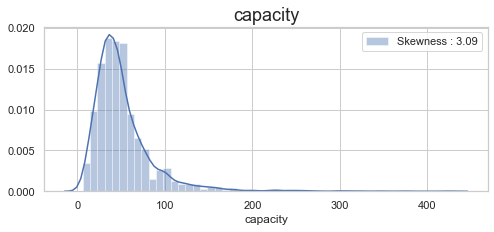

In [16]:
print('--------------------------------------------------------------------------------------')
print('Major - University with the most capacity :')
print(data_major_univ[['major_univ_name', 'capacity']][data_major_univ['capacity'] == data_major_univ['capacity'].max()])
print('--------------------------------------------------------------------------------------')
print('Major - University with the few capacity :')
print(data_major_univ[['major_univ_name', 'capacity']][data_major_univ['capacity'] == data_major_univ['capacity'].min()])
print('--------------------------------------------------------------------------------------')
print('Description of capacity column :')
print(data_major_univ['capacity'].describe())
fig, ax = plt.subplots(figsize = (8, 4))
fig.tight_layout(pad = 5)

sns.distplot(ax = ax, a = data_major_univ['capacity'].dropna(), label = "Skewness : %.2f"%(data_major_univ['capacity'].skew()))
ax.set_title('capacity', fontsize = 18)
ax.legend(loc = 'best')

plt.show()


#### Top 10 Most Major are Provided by Universities & Universities Based on the Most Number of Majors

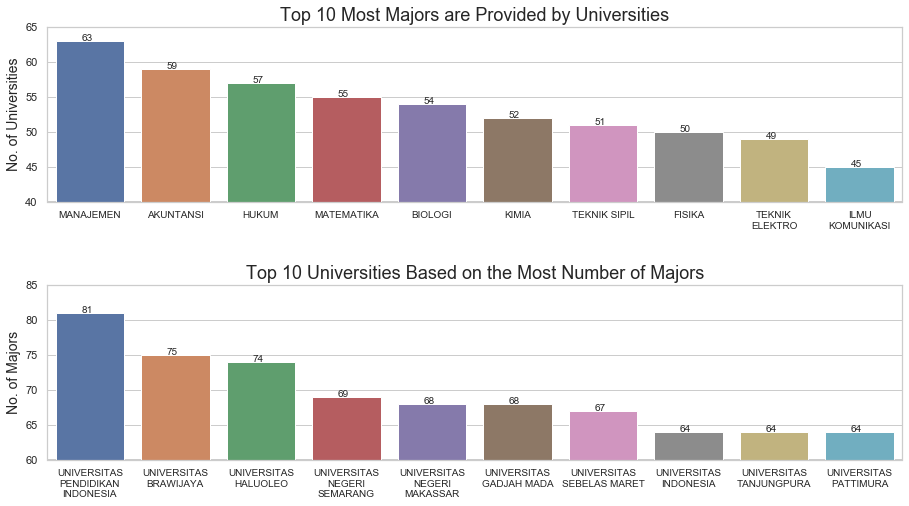

In [17]:
# Visualize top 10 most major are provided by universities & universities based on the most number of majors with barplot

fig, ax = plt.subplots(2,1, figsize = (14, 8))
fig.tight_layout(pad = 6)
max_width = 13

index = data_major_univ['major_name'].fillna('NaN').value_counts().index[0:10]
count = data_major_univ['major_name'].fillna('NaN').value_counts()[0:10]
sns.barplot(ax = ax[0], x = index, y = count, order = index)
ax[0].set_title('Top 10 Most Majors are Provided by Universities', fontsize = 18)
ax[0].set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax[0].get_xticklabels()), fontsize = 10)
for index,count in enumerate(count):
    ax[0].text(x=index-0.1 , y =count+0 , s=f"{count}" , fontdict=dict(fontsize=10))
ax[0].set_ylabel('No. of Universities', fontsize = 14)
ax[0].set_ylim(40, 65)


index = data_major_univ['university_name'].fillna('NaN').value_counts().index[0:10]
count = data_major_univ['university_name'].fillna('NaN').value_counts()[0:10]
sns.barplot(ax = ax[1], x = index, y = count, order = index)
ax[1].set_title('Top 10 Universities Based on the Most Number of Majors', fontsize = 18)
ax[1].set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax[1].get_xticklabels()), fontsize = 10)
for index,count in enumerate(count):
    ax[1].text(x=index-0.1 , y=count+0 , s=f"{count}" , fontdict=dict(fontsize=10))
ax[1].set_ylabel('No. of Majors', fontsize = 14)
ax[1].set_ylim(60, 85)
plt.show()

#### Piechart Type of Majors

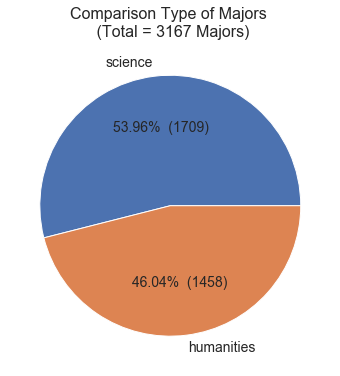

In [18]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in data_major_univ['type'].value_counts()]
labels = list(data_major_univ['type'].value_counts().index)
ax.pie(x = sizes, labels = labels, autopct = make_autopct(sizes),textprops={'fontsize': 14})
ax.set_title('Comparison Type of Majors \n (Total = 3167 Majors)', fontsize = 16)
plt.show()

## Analysis Numeric and Categorical Data on "Score Humanities" Data 

### Analysis Numeric Data on "Score Humanities" Data

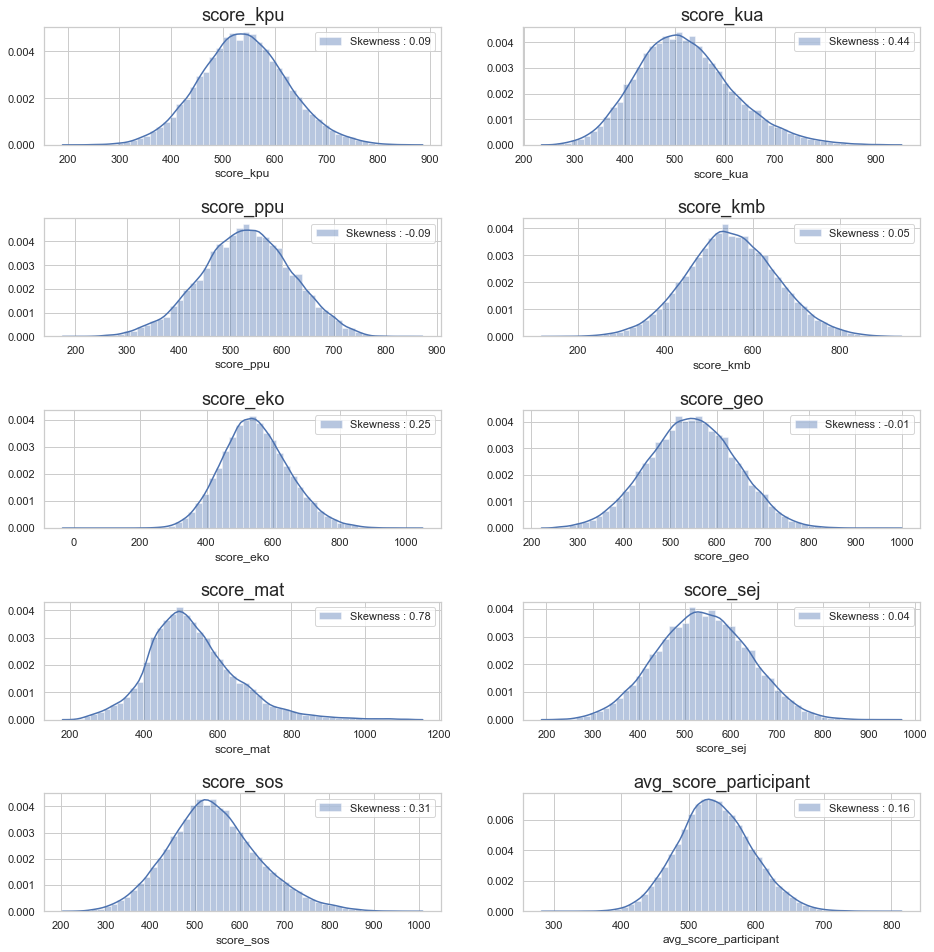

In [19]:
# Define and reorder (based on parts/waves of examinations) numeric columns on "Score Humanities" Data
num_score_humanities = ['score_kpu', 'score_kua', 'score_ppu', 'score_kmb', 
                        'score_eko', 'score_geo','score_mat', 'score_sej', 'score_sos', 
                        'avg_score_participant']

# Create distribution plot on each columns
fig, ax = plt.subplots(5, 2, figsize = (14, 14))
fig.tight_layout(pad = 5)

for ax, n in zip(ax.flatten(), num_score_humanities):
    sns.distplot(ax = ax, a = score_humanities[n].dropna(), label = "Skewness : %.2f"%(score_humanities[n].skew()))
    ax.set_title(n, fontsize = 18)
    ax.legend(loc = 'best')

plt.show()

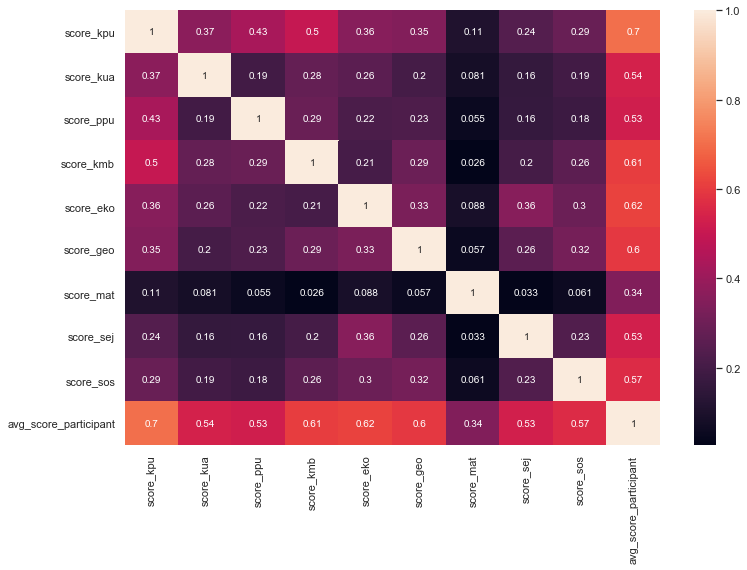

In [20]:
# Create heatmap data numeric
cormat = score_humanities[num_score_humanities].corr()
fig, ax = plt.subplots(figsize = (12, 8))
sns.heatmap(ax = ax, data = cormat, annot = True)
ax.set_yticklabels(cormat,rotation = 0)
plt.show()

### Analysis Categorical Data on "Score Humanities" Data

#### Analysis First Choices Humanities-related Majors and Universities from Participants Who Take Humanities-type Examinations 

In [21]:
# Define categorical columns on "Score Humanities" Data
first_choice_humanities = ['major_name_first_choice', 'university_name_first_choice']
first_choice_titles = ['Top 10 First Choices Humanities-related Majors', 'Top 10 First Choices Universities (Humanities-related Majors)']

##### - Barplot Top 10 First Choices  Humanities-related Majors and Universities

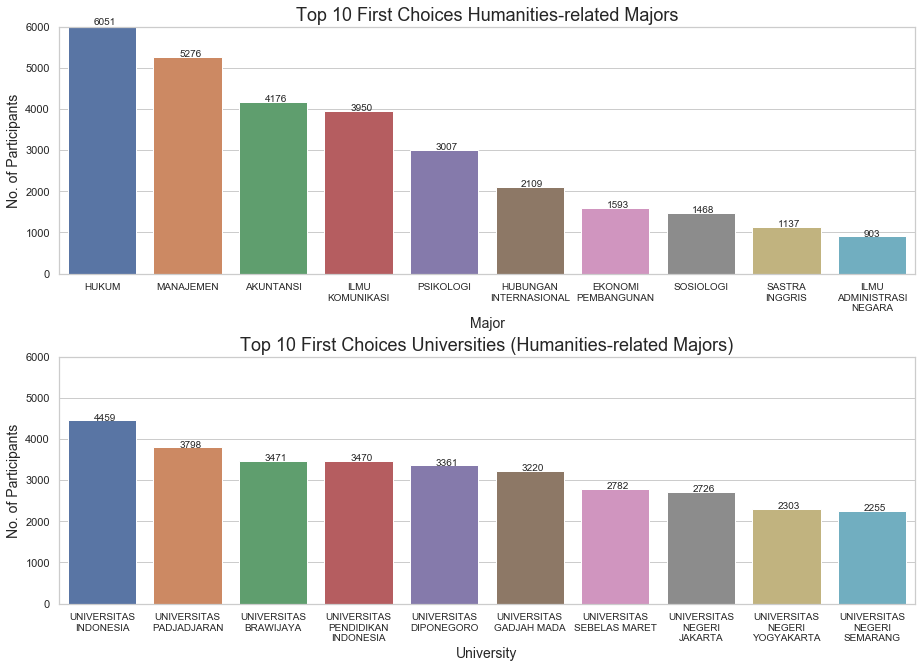

In [22]:
# Visualize top 10 first choices humanities-related majors and universities with barplot

fig, ax = plt.subplots(len(first_choice_humanities), 1, figsize = (14, 10))
fig.tight_layout(pad = 6)
max_width = 13

for ax, col, name, xlabel in zip(ax.flatten(), first_choice_humanities, first_choice_titles, ['Major', 'University']):
    index = score_humanities[col].fillna('NaN').value_counts().index[0:10]
    count = score_humanities[col].fillna('NaN').value_counts()[0:10]
    sns.barplot(ax = ax, x = index, y = count, order = index)
    ax.set_title(name, fontsize = 18)
    ax.set_xlabel(xlabel, fontsize = 14)
    ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)
    for index,count in enumerate(count):
        ax.text(x=index-0.1 , y=count+0 , s=f"{count}" , fontdict=dict(fontsize=10))
    ax.set_ylabel('No. of Participants', fontsize = 14)
    ax.set_ylim(0,6000)
    
plt.show()

##### - Boxplot Average Score Participants on Top 10 First Choices Humanities-related Majors and Universities 

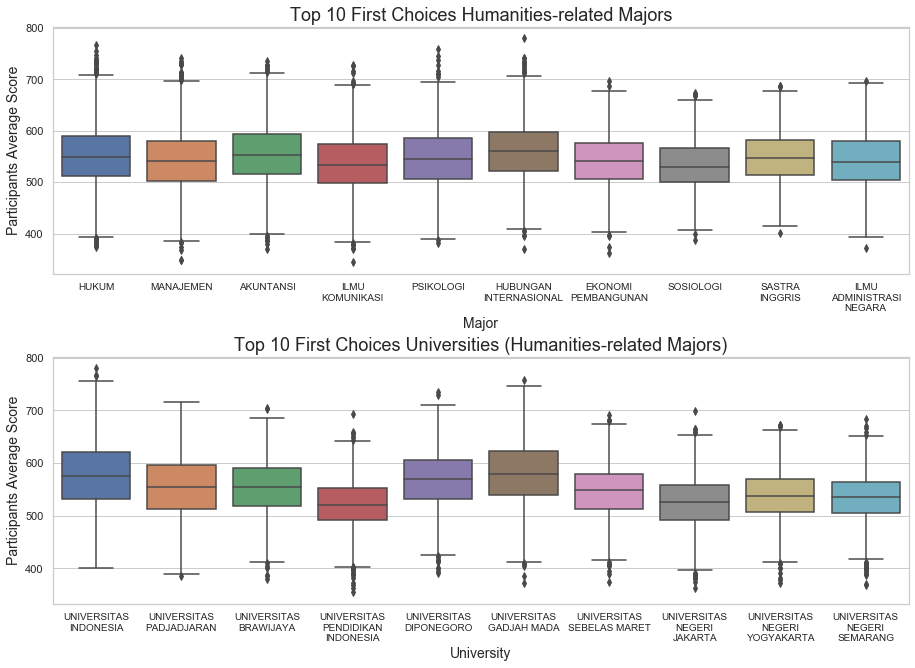

In [23]:
# Visualize top 10 first choices humanities-related majors and universities with boxplot based on average score participants

fig, ax = plt.subplots(len(first_choice_humanities), 1, figsize = (14, 10))
fig.tight_layout(pad = 6)
max_width = 13

for ax, col, name, xlabel in zip(ax.flatten(), first_choice_humanities, first_choice_titles, ['Major', 'University']):
    values = score_humanities[col].value_counts().sort_values(ascending = False).index[0:10]
    top_data = score_humanities[score_humanities[col].isin(values)]
    sns.boxplot(ax = ax, data=top_data, x = top_data[col], y = top_data['avg_score_participant'], order = values)
    ax.set_title(name, fontsize = 18)
    ax.set_xlabel(xlabel, fontsize = 14)
    ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)
    ax.set_ylabel('Participants Average Score', fontsize = 14)

plt.show()

##### - Barplot (Counts Participants) and Boxplot (Participants AVG Score) on Top 5 First Choices Humanities-related Majors - Universities

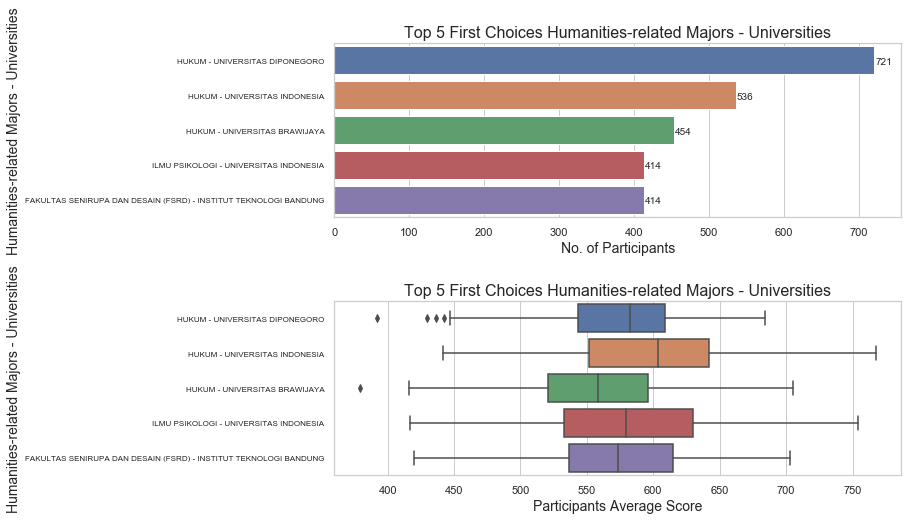

In [24]:
# Visualize top 5 first choices humanities-related majors - universities with barplot and boxplot

fig, ax = plt.subplots(2, 1, figsize = (10, 8))
fig.tight_layout(pad = 6)

index = score_humanities['specific_first_choice'].fillna('NaN').value_counts().index[0:5]
count = score_humanities['specific_first_choice'].fillna('NaN').value_counts()[0:5]
sns.barplot(ax = ax[0], x = count, y = index, order = index)
ax[0].set_title('Top 5 First Choices Humanities-related Majors - Universities', fontsize = 16)
ax[0].set_xlabel('No. of Participants', fontsize = 14)
ax[0].set_ylabel('Humanities-related Majors - Universities', fontsize = 14)
ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize = 8)
for index,count in enumerate(count):
        ax[0].text(x=count+1, y=index+0.1, s=f"{count}" , fontdict=dict(fontsize=10))


values = score_humanities['specific_first_choice'].value_counts().sort_values(ascending = False).index[0:5]
top5_data = score_humanities[score_humanities['specific_first_choice'].isin(values)]
sns.boxplot(ax = ax[1], data=top5_data, x = top5_data['avg_score_participant'], y = top5_data['specific_first_choice'], order = values)
ax[1].set_title('Top 5 First Choices Humanities-related Majors - Universities', fontsize = 16)
ax[1].set_xlabel('Participants Average Score', fontsize = 14)
ax[1].set_ylabel('Humanities-related Majors - Universities', fontsize = 14)
ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize = 8)
plt.show()


#### Analysis Second Choices Humanities-related Majors and Universities from Participants Who Take Humanities-type Examinations 

In [25]:
# Define categorical columns on "Score Humanities" Data
second_choice_humanities = ['major_name_second_choice', 'university_name_second_choice']
second_choice_titles = ['Top 10 Second Choices Humanities-related Majors', 'Top 10 Second Choices Universities (Humanities-related Majors)']

##### - Barplot Top 10 Second Choices Humanities-related Majors and Universities

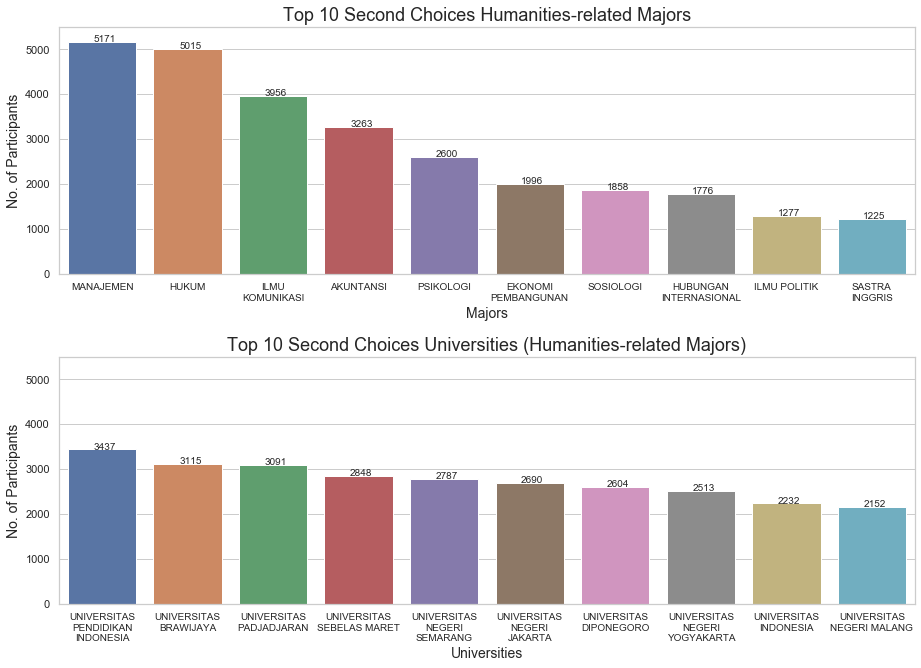

In [26]:
# Visualize top 10 second choices humanities-related majors and universities with barplot

fig, ax = plt.subplots(len(first_choice_humanities), 1, figsize = (14, 10))
fig.tight_layout(pad = 6)
max_width = 13

for ax, col, name, xlabel in zip(ax.flatten(), second_choice_humanities, second_choice_titles, ['Majors', 'Universities']):
    index = score_humanities[col].fillna('NaN').value_counts().index[0:10]
    count = score_humanities[col].fillna('NaN').value_counts()[0:10]
    sns.barplot(ax = ax, x = index, y = count, order = index)
    ax.set_title(name, fontsize = 18)
    ax.set_xlabel(xlabel, fontsize = 14)
    ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)
    for index,count in enumerate(count):
        ax.text(x=index-0.1 , y =count+0 , s=f"{count}" , fontdict=dict(fontsize=10))
    ax.set_ylabel('No. of Participants', fontsize = 14)
    ax.set_ylim(0, 5500)

plt.show()

##### - Boxplot  Average Score Participants on Top 10 Second Choices Humanities-related Majors and Universities 

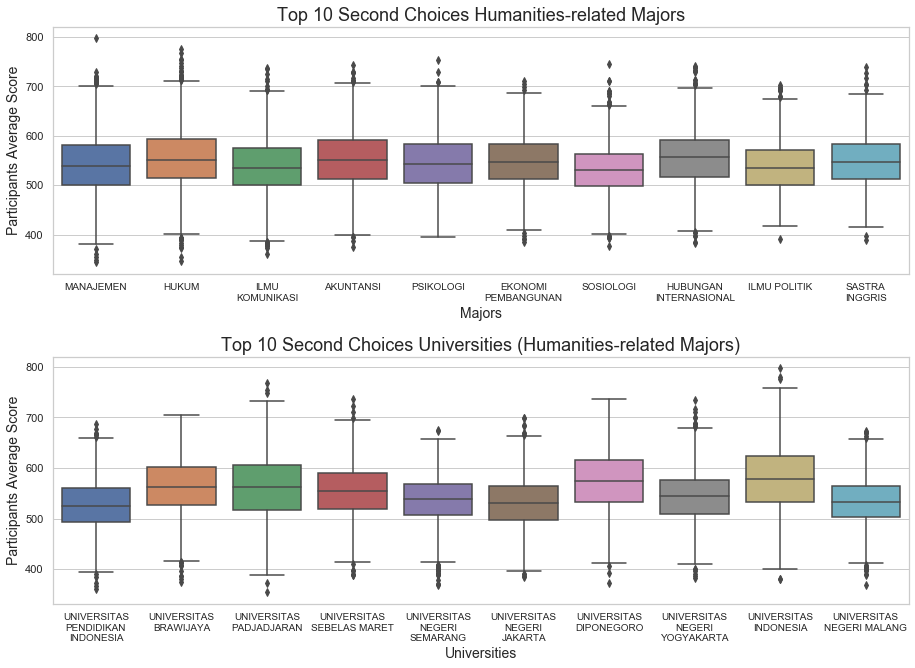

In [27]:
# Visualize top 10 second choices humanities-related majors and universities with boxplot based on average score participants

fig, ax = plt.subplots(len(second_choice_humanities), 1, figsize = (14, 10))
fig.tight_layout(pad = 6)
max_width = 13

for ax, col, name, xlabel in zip(ax.flatten(), second_choice_humanities, second_choice_titles, ['Majors', 'Universities']):
    values = score_humanities[col].value_counts().sort_values(ascending = False).index[0:10]
    top_data = score_humanities[score_humanities[col].isin(values)]
    sns.boxplot(ax = ax, data=top_data, x = top_data[col], y = top_data['avg_score_participant'], order = values)
    ax.set_title(name, fontsize = 18)
    ax.set_xlabel(xlabel, fontsize = 14)
    ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)
    ax.set_ylabel('Participants Average Score', fontsize = 14)

plt.show()

##### - Barplot (Counts Participants) and Boxplot (Participants AVG Score)  on Top 5 Second Choices Humanities-related Majors – Universities 

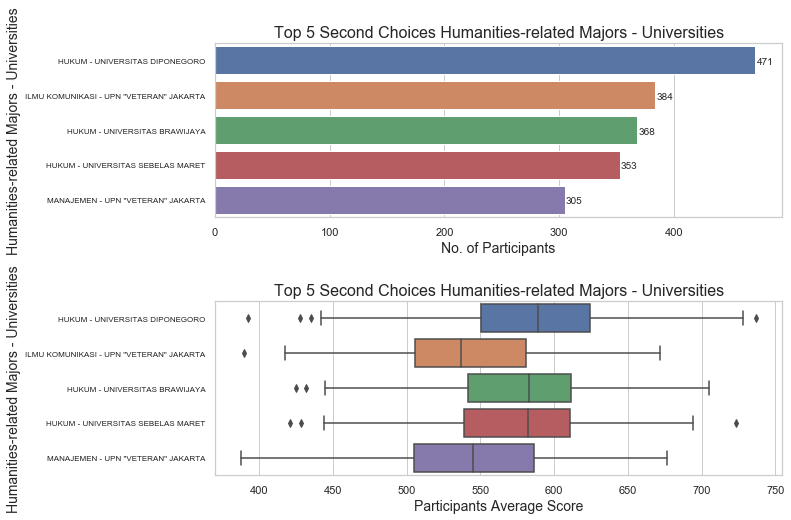

In [28]:
# Visualize top 5 second choices humanities-related majors - universities with barplot and boxplot

fig, ax = plt.subplots(2, 1, figsize = (10, 8))
fig.tight_layout(pad = 6)

index = score_humanities['specific_second_choice'].fillna('NaN').value_counts().index[0:5]
count = score_humanities['specific_second_choice'].fillna('NaN').value_counts()[0:5]
sns.barplot(ax = ax[0], x = count, y = index, order = index)
ax[0].set_title('Top 5 Second Choices Humanities-related Majors - Universities', fontsize = 16)
ax[0].set_xlabel('No. of Participants', fontsize = 14)
ax[0].set_ylabel('Humanities-related Majors - Universities', fontsize = 14)
ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize = 8)
for index,count in enumerate(count):
        ax[0].text(x=count+1, y=index+0.1, s=f"{count}" , fontdict=dict(fontsize=10))


values = score_humanities['specific_second_choice'].value_counts().sort_values(ascending = False).index[0:5]
top5_data = score_humanities[score_humanities['specific_second_choice'].isin(values)]
sns.boxplot(ax = ax[1], data=top5_data, x = top5_data['avg_score_participant'], y = top5_data['specific_second_choice'], order = values)
ax[1].set_title('Top 5 Second Choices Humanities-related Majors - Universities', fontsize = 16)
ax[1].set_xlabel('Participants Average Score', fontsize = 14)
ax[1].set_ylabel('Humanities-related Majors - Universities', fontsize = 14)
ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize = 8)
plt.show()

## Analysis Numeric and Categorical Data on "Score Science" Data

### Analysis Numeric Data on "Score Science" Data

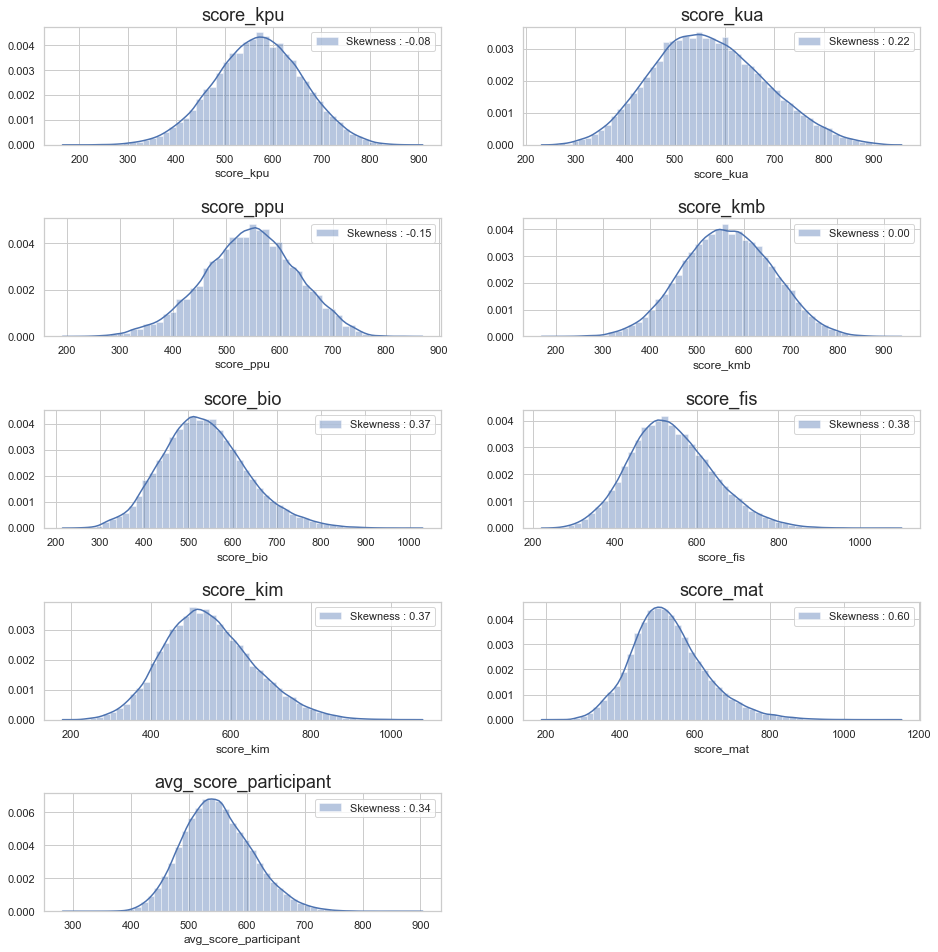

In [29]:
# Define and reorder (based on parts/waves of examinations) numeric columns on "Score Science" Data
num_score_science = ['score_kpu', 'score_kua', 'score_ppu', 'score_kmb',
                     'score_bio', 'score_fis', 'score_kim','score_mat',
                     'avg_score_participant']

# Create distribution plot on each columns
fig, ax = plt.subplots(5, 2, figsize = (14, 14))
fig.tight_layout(pad = 5)
fig.delaxes(ax[4][1])

for ax, n in zip(ax.flatten(), num_score_science):
    sns.distplot(ax = ax, a = score_science[n].dropna(), label = "Skewness : %.2f"%(score_science[n].skew()))
    ax.set_title(n, fontsize = 18)
    ax.legend(loc = 'best')


plt.show()

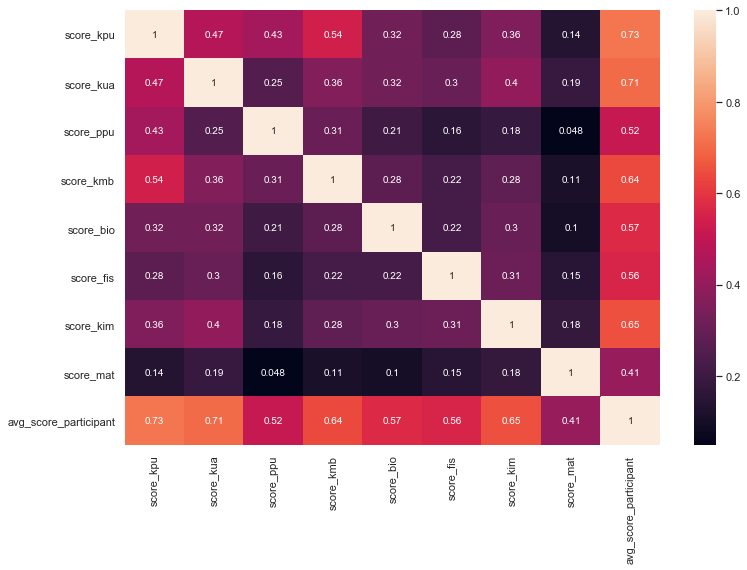

In [30]:
# Create heatmap data numeric
cormat = score_science[num_score_science].corr()
fig, ax = plt.subplots(figsize = (12, 8))
sns.heatmap(ax = ax, data = cormat, annot = True)
ax.set_yticklabels(cormat,rotation = 0)
plt.show()

### Analysis Categorical Data on "Score Science" Data

#### Analysis First Choices Science-related Majors and Universities from Participants Who Take Science-type Examinations 

In [31]:
# Define categorical columns on "Score Humanities" Data
first_choice_science = ['major_name_first_choice', 'university_name_first_choice']
first_choice_titles = ['Top 10 First Choices Science-related Majors', 'Top 10 First Choices Universities (Science-related Majors)']

##### - Barplot Top 10 First Choices Science-related Majors and Universities

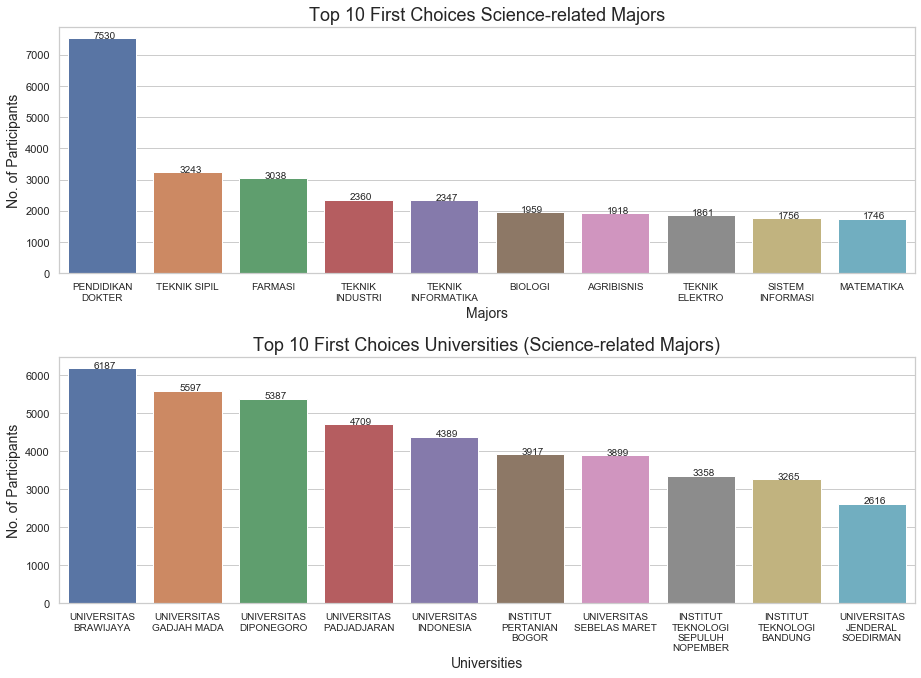

In [32]:
# Visualize top 10 first choices science-related majors and universities with barplot

fig, ax = plt.subplots(len(first_choice_science), 1, figsize = (14, 10))
fig.tight_layout(pad = 6)
max_width = 13

for ax, col, name, xlabel in zip(ax.flatten(), first_choice_science, first_choice_titles, ['Majors', 'Universities']):
    index = score_science[col].fillna('NaN').value_counts().index[0:10]
    count = score_science[col].fillna('NaN').value_counts()[0:10]
    sns.barplot(ax = ax, x = index, y = count, order = index)
    ax.set_title(name, fontsize = 18)
    ax.set_xlabel(xlabel, fontsize = 14)
    ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)
    for index,count in enumerate(count):
        ax.text(x=index-0.1 , y =count+0 , s=f"{count}" , fontdict=dict(fontsize=10))    
    ax.set_ylabel('No. of Participants', fontsize = 14)
plt.show()

##### - Boxplot Average Score Participants on Top 10 First Choices Science-related Majors and Universities

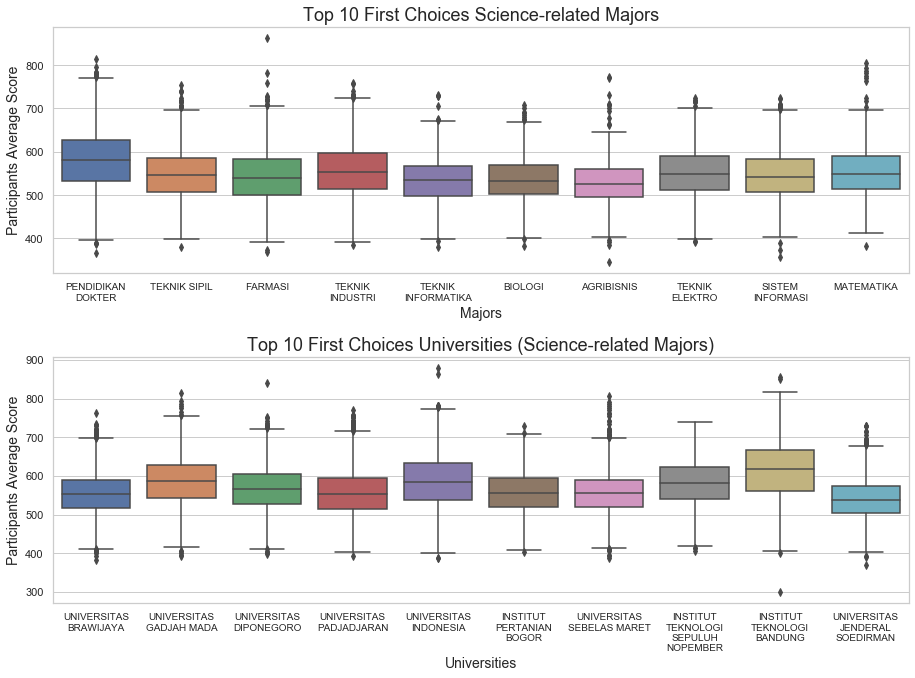

In [33]:
# Visualize top 10 first choices science-related majors and universities with boxplot based on average score participants

fig, ax = plt.subplots(len(first_choice_science), 1, figsize = (14, 10))
fig.tight_layout(pad = 6)
max_width = 13

for ax, col, name, xlabel in zip(ax.flatten(), first_choice_science, first_choice_titles, ['Majors', 'Universities']):
    values = score_science[col].value_counts().sort_values(ascending = False).index[0:10]
    top_data = score_science[score_science[col].isin(values)]
    sns.boxplot(ax = ax, data=top_data, x = top_data[col], y = top_data['avg_score_participant'], order = values)
    ax.set_title(name, fontsize = 18)
    ax.set_xlabel(xlabel, fontsize = 14)
    ax.set_ylabel('Participants Average Score', fontsize = 14)
    ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)

plt.show()

##### -Barplot (Counts Participants) and Boxplot (Participants AVG Score) on Top 5 First Choices Science-related Majors - Universities

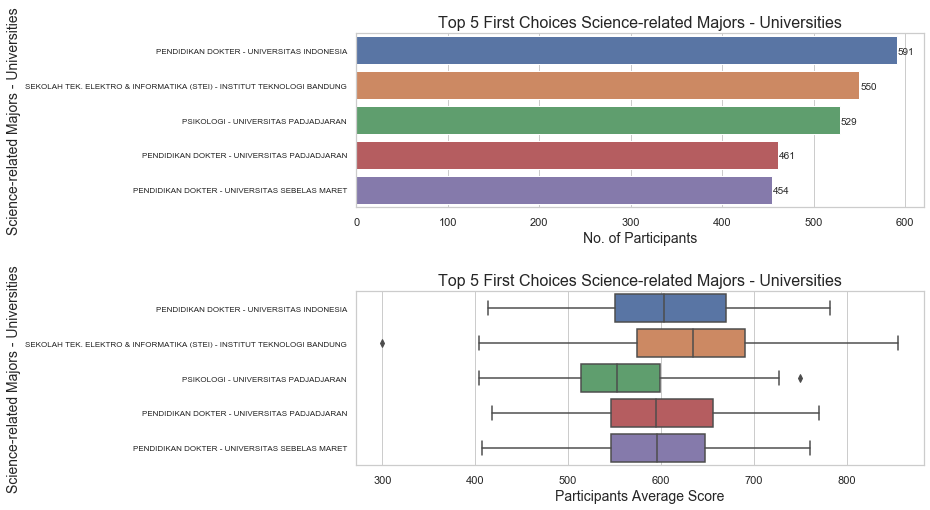

In [34]:
# Visualize top 5 first choices science-related majors - universities with barplot and boxplot

fig, ax = plt.subplots(2, 1, figsize = (10, 8))
fig.tight_layout(pad = 6)

index = score_science['specific_first_choice'].fillna('NaN').value_counts().index[0:5]
count = score_science['specific_first_choice'].fillna('NaN').value_counts()[0:5]
sns.barplot(ax = ax[0], x = count, y = index, order = index)
ax[0].set_title('Top 5 First Choices Science-related Majors - Universities', fontsize = 16)
ax[0].set_xlabel('No. of Participants', fontsize = 14)
ax[0].set_ylabel('Science-related Majors - Universities', fontsize = 14)
ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize = 8)
for index,count in enumerate(count):
        ax[0].text(x=count+1, y=index+0.1, s=f"{count}" , fontdict=dict(fontsize=10))

values = score_science['specific_first_choice'].value_counts().sort_values(ascending = False).index[0:5]
top5_data = score_science[score_science['specific_first_choice'].isin(values)]
sns.boxplot(ax = ax[1], data=top5_data, x = top5_data['avg_score_participant'], y = top5_data['specific_first_choice'], order = values)
ax[1].set_title('Top 5 First Choices Science-related Majors - Universities', fontsize = 16)
ax[1].set_xlabel('Participants Average Score', fontsize = 14)
ax[1].set_ylabel('Science-related Majors - Universities', fontsize = 14)
ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize = 8)
plt.show()

#### Analysis Second Choices Science-related Majors and Universities from Participants Who Take Science-type Examinations 

In [35]:
# Define categorical columns on "Score Humanities" Data
second_choice_science = ['major_name_second_choice', 'university_name_second_choice']
second_choice_titles = ['Top 10 Second Choices Science-related Majors', 'Top 10 Second Choices Universities (Science-related Majors)']

##### - Barplot Top 10 Second Choices Major and University

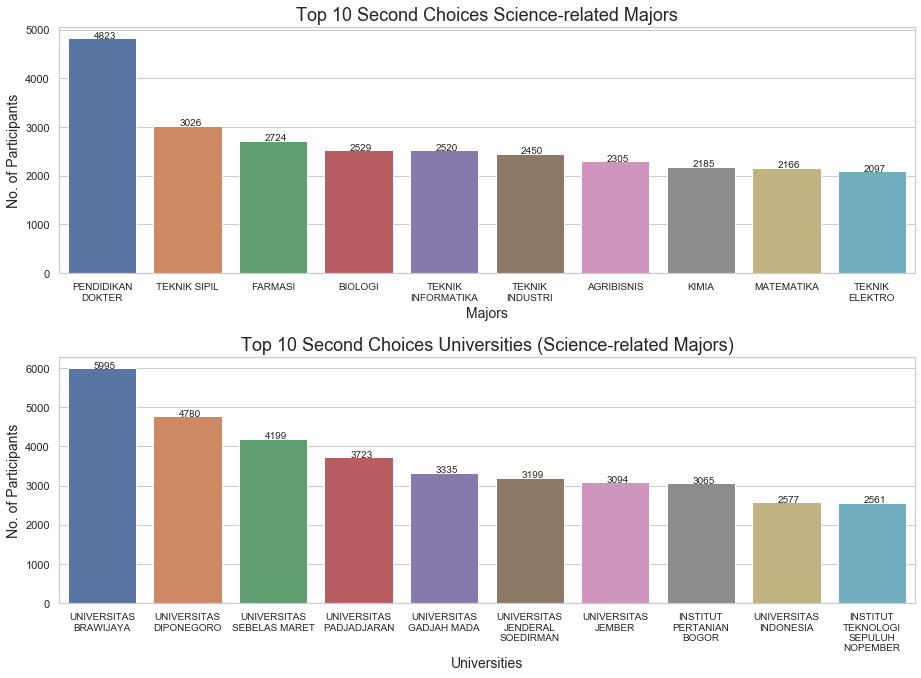

In [36]:
# Visualize top 10 second choices science-related majors and universities with barplot

fig, ax = plt.subplots(len(first_choice_science), 1, figsize = (14, 10))
fig.tight_layout(pad = 6)
max_width = 13

for ax, col, name, xlabel in zip(ax.flatten(), second_choice_science, second_choice_titles, ['Majors', 'Universities']):
    index = score_science[col].fillna('NaN').value_counts().index[0:10]
    count = score_science[col].fillna('NaN').value_counts()[0:10]
    sns.barplot(ax = ax, x = index, y = count, order = index)
    ax.set_title(name, fontsize = 18)
    ax.set_xlabel(xlabel, fontsize = 14)
    ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)
    for index,count in enumerate(count):
        ax.text(x=index-0.1 , y =count+0 , s=f"{count}" , fontdict=dict(fontsize=10))  
    ax.set_ylabel('No. of Participants', fontsize = 14)

plt.show()

##### - Boxplot Average Score Participants on Top 10 Second Choices Science-related Majors and Universities

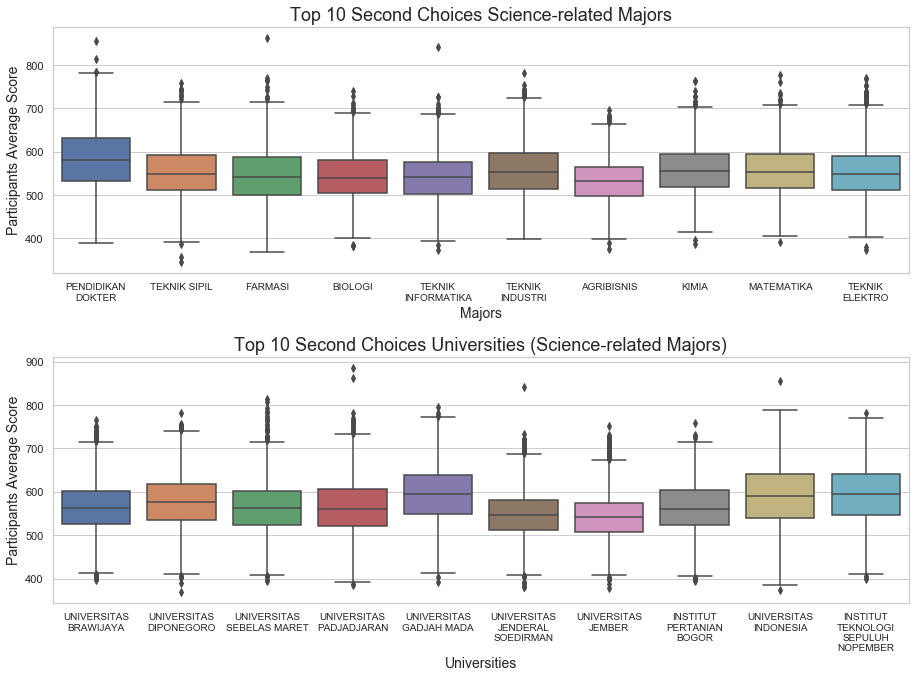

In [37]:
# Visualize top 10 second choices science-related majors and universities with boxplot

fig, ax = plt.subplots(len(second_choice_science), 1, figsize = (14, 10))
fig.tight_layout(pad = 6)
max_width = 13

for ax, col, name, xlabel in zip(ax.flatten(), second_choice_science, second_choice_titles, ['Majors', 'Universities']):
    values = score_science[col].value_counts().sort_values(ascending = False).index[0:10]
    top_data = score_science[score_science[col].isin(values)]
    sns.boxplot(ax = ax, data=top_data, x = top_data[col], y = top_data['avg_score_participant'], order = values)
    ax.set_title(name, fontsize = 18)
    ax.set_xlabel(xlabel, fontsize = 14)
    ax.set_ylabel('Participants Average Score', fontsize = 14)
    ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)

plt.show()

##### - Barplot (Counts Participants) and Boxplot (Participants AVG Score) on Top 5 Second Choices Science-related Majors - Universities

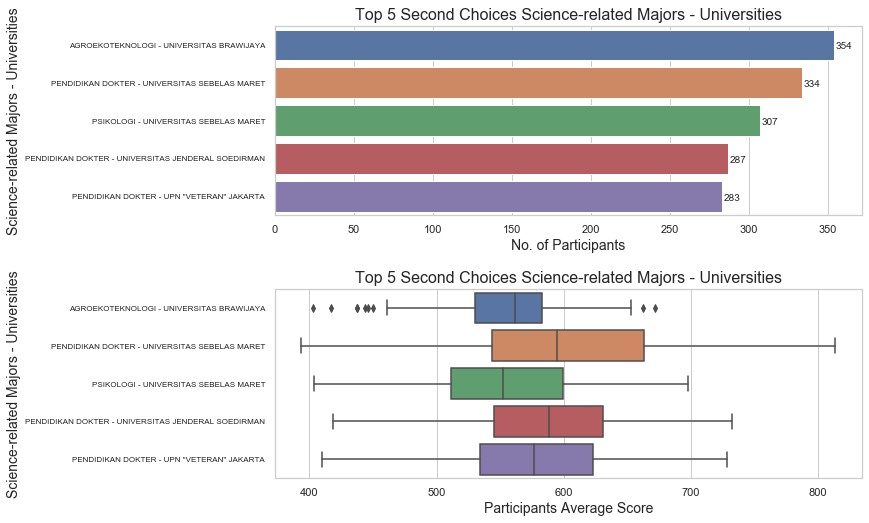

In [38]:
# Visualize top 5 second choices science-related Majors - universities with barplot and boxplot

fig, ax = plt.subplots(2, 1, figsize = (10, 8))
fig.tight_layout(pad = 5)

index = score_science['specific_second_choice'].fillna('NaN').value_counts().index[0:5]
count = score_science['specific_second_choice'].fillna('NaN').value_counts()[0:5]
sns.barplot(ax = ax[0], x = count, y = index, order = index)
ax[0].set_title('Top 5 Second Choices Science-related Majors - Universities', fontsize = 16)
ax[0].set_xlabel('No. of Participants', fontsize = 14)
ax[0].set_ylabel('Science-related Majors - Universities', fontsize = 14)
ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize = 8)
for index,count in enumerate(count):
        ax[0].text(x=count+1, y=index+0.1, s=f"{count}" , fontdict=dict(fontsize=10))

values = score_science['specific_second_choice'].value_counts().sort_values(ascending = False).index[0:5]
top5_data = score_science[score_science['specific_second_choice'].isin(values)]
sns.boxplot(ax = ax[1], data=top5_data, x = top5_data['avg_score_participant'], y = top5_data['specific_second_choice'], order = values)
ax[1].set_title('Top 5 Second Choices Science-related Majors - Universities', fontsize = 16)
ax[1].set_xlabel('Participants Average Score', fontsize = 14)
ax[1].set_ylabel('Science-related Majors - Universities', fontsize = 14)
ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize = 8)
plt.show()